In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("acl-publication-info.74k.v2.parquet")

In [3]:
df['numcitedby']

0         14
1         93
2         10
3         15
4         12
        ... 
73280     11
73281     12
73282     14
73283     92
73284    330
Name: numcitedby, Length: 73285, dtype: int64

In [4]:
df['full_text']

0        There is a need to measure word similarity whe...
1                                                     None
2        Thread disentanglement is the task of separati...
3        In this paper, we describe a word alignment al...
4                                                     None
                               ...                        
73280    This paper describes recent progress and the a...
73281    We present an LFG-DOP parser which uses fragme...
73282    The processes through which readers evoke ment...
73283    This paper examines the extent to which verb d...
73284    Spoken dialogue managers have benefited from u...
Name: full_text, Length: 73285, dtype: object

In [5]:
# get the columns of the dataset

print(f"Columns are {df.columns}")

# shape of the dataset (number of papers)
num_papers = df.shape[0]
print(f"number of papers is {num_papers}")

# unique languages
unique_languages = df['language'].unique()
print(f"unique languages are {unique_languages}")

# the publishers
unique_publishers = len(df['publisher'].unique())
print(f"number of unique publishers are {unique_publishers}")

# the journals
unique_journals = df['journal'].unique()
print(f"journals are {unique_journals}")

Columns are Index(['acl_id', 'abstract', 'full_text', 'corpus_paper_id', 'pdf_hash',
       'numcitedby', 'url', 'publisher', 'address', 'year', 'month',
       'booktitle', 'author', 'title', 'pages', 'doi', 'number', 'volume',
       'journal', 'editor', 'isbn', 'ENTRYTYPE', 'ID', 'language', 'note'],
      dtype='object')
number of papers is 73285
unique languages are [None 'English' 'French' 'Chinese' 'German' 'Portuguese (Brazil)']
number of unique publishers are 112
journals are [None 'American Journal of Computational Linguistics'
 'Computational Linguistics'
 'Transactions of the Association for Computational Linguistics']


In [6]:
# summary statistics
# First we are interested in the average number of citations of papers for each of the journals
# get the average number of citations for the American Journal of Computational Linguistics
american_journal_comp_ling = df.loc[df['journal'] == 'American Journal of Computational Linguistics']
num_papers_american_journal_comp_ling = american_journal_comp_ling.shape[0]
mean_citation = round(american_journal_comp_ling['numcitedby'].mean(),2)
print(f"For the American Journal of Computational Linguistics, there are {num_papers_american_journal_comp_ling} papers with average {mean_citation} citations")

# the average number of citations for a paper in Computational Linguistics
comp_ling = df.loc[df['journal'] == 'Computational Linguistics']
num_papers_comp_ling = comp_ling.shape[0]
mean_citation = round(comp_ling['numcitedby'].mean(),2)
print(f"For the Computational Linguistics, there are {num_papers_comp_ling} papers with average {mean_citation} citations")

# the average number of citations for a paper in Transactions of the Association for Computational Linguistics
trans_acl = df.loc[df['journal'] == 'Transactions of the Association for Computational Linguistics']
num_papers_trans_acl = trans_acl.shape[0]
mean_citation = round(trans_acl['numcitedby'].mean(),2)
print(f"For the Transactions of the Association for Computational Linguistics, there are {num_papers_trans_acl} papers with average {mean_citation} citations")

num_papers_in_journals = num_papers_american_journal_comp_ling + num_papers_comp_ling + num_papers_trans_acl
print(f"Total number of journal papers is {num_papers_in_journals}")

For the American Journal of Computational Linguistics, there are 328 papers with average 22.96 citations
For the Computational Linguistics, there are 1376 papers with average 112.77 citations
For the Transactions of the Association for Computational Linguistics, there are 333 papers with average 113.14 citations
Total number of journal papers is 2037


In [7]:
# number of papers for each language
# english
english_papers = df.loc[df['language'] == 'English']
num_english_papers = english_papers.shape[0]
mean_citation_english_paper = round(english_papers['numcitedby'].mean(),2)
print(f"For the English papers, there are {num_english_papers} with average of {mean_citation_english_paper} citations")

# french
french_papers = df.loc[df['language'] == 'French']
num_french_papers = french_papers.shape[0]
mean_citation_french_paper = round(french_papers['numcitedby'].mean(),2)
print(f"For the French papers, there are {num_french_papers} papers with average of {mean_citation_french_paper} citations")

# chinese
chinese_papers = df.loc[df['language'] == 'Chinese']
num_chinese_papers = chinese_papers.shape[0]
mean_citation_chinese_paper = round(chinese_papers['numcitedby'].mean(),2)
print(f"For the Chinese papers, there are {num_chinese_papers} papers with average of {mean_citation_chinese_paper} citations")

# german
german_papers = df.loc[df['language'] == 'German']
num_german_papers = german_papers.shape[0]
mean_citation_german_paper = round(german_papers['numcitedby'].mean(),2)
print(f"For the German papers, there are {num_german_papers} papers with average of {mean_citation_german_paper} citations")

# portuguese
portuguese_papers = df.loc[df['language'] == 'Portuguese (Brazil)']
num_portuguese_papers = portuguese_papers.shape[0]
mean_citation_portuguese_paper = round(portuguese_papers['numcitedby'].mean(),2)
print(f"For the Portuguese papers, there are {num_portuguese_papers} papers with average of {mean_citation_portuguese_paper} citations")


For the English papers, there are 1371 with average of 6.46 citations
For the French papers, there are 1453 papers with average of 3.37 citations
For the Chinese papers, there are 188 papers with average of 0.12 citations
For the German papers, there are 6 papers with average of 0.17 citations
For the Portuguese papers, there are 2 papers with average of 0.0 citations


In [7]:
# authors (number of authors who have contributed a paper)
authors = df['author'].unique()
len(authors)

59809

In [8]:
df[['year','month']]

,year,month
0,2002,August
1,2002,May
2,2013,September
3,2005,June
4,2002,May
...,...,...
73280,1999,June
73281,2000,October
73282,1999,June
73283,1999,June


In [8]:
years = df[['year']]


num_papers_each_year_after_2000 = years.loc[years['year'] >= '2000'].value_counts()

recent_years = years.loc[years['year'] >= '2000']

recent_years_keys = recent_years['year'].sort_values().unique()
type(num_papers_each_year_after_2000)

#sns.barplot()
#num_papers_each_year_after_2000.values, num_papers_each_year_after_2000.keys().numpy()

pandas.core.series.Series

In [17]:
years = df[['year']]
years.drop_duplicates()

,year
0,2002
2,2013
3,2005
16,2009
23,2018
...,...
48702,1962
48721,1952
49278,1971
62805,1956


(array([18257., 16518., 16732., 12155.,  4180.,  2294.,  2211.,   259.,
          456.,   223.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

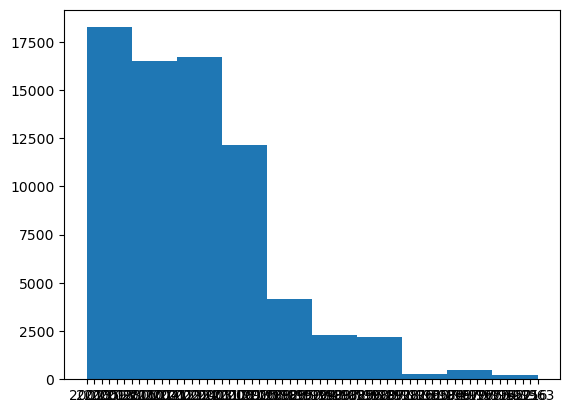

In [10]:
# plot it in a bar chart for visualization purposes
import matplotlib.pyplot as plt
plt.hist(df[['year']])

In [28]:
recent_df = df[df['year'] >= '2000']
recent_df

,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,doi,number,volume,journal,editor,isbn,ENTRYTYPE,ID,language,note
2669,L00-1002,None,None,13027948,b3859615c4a6d201ef18ed4f20cc954c90492fbd,2,http://www.lrec-conf.org/proceedings/lrec2000/...,European Language Resources Association (ELRA),"Athens, Greece",2000,...,None,None,None,None,None,None,inproceedings,shudo-etal-2000-collocations,None,None
28969,W00-1016,This paper describes a dialog helpsystem which...,This paper describes a dialog helpsystem which...,1864964,692d7f548d3d10f8530854e4c09ea4a7cd52fcfe,25,https://aclanthology.org/W00-1016,Association for Computational Linguistics,"Hong Kong, China",2000,...,10.3115/1117736.1117752,None,None,None,None,None,inproceedings,kurohashi-higasa-2000-dialogue,None,None
11504,L00-1144,None,None,6304384,a666426f5a8d84d7a7c6fe9e6b60a5d38e23bc75,21,http://www.lrec-conf.org/proceedings/lrec2000/...,European Language Resources Association (ELRA),"Athens, Greece",2000,...,None,None,None,None,None,None,inproceedings,geoffrois-etal-2000-transcribing,None,None
11053,2000.amta-systems.4,The LabelTool/TrTool system is designed to adm...,None,35928851,None,0,https://link.springer.com/chapter/10.1007/3-54...,Springer,"Cuernavaca, Mexico",2000,...,None,None,None,None,None,None,inproceedings,lu-etal-2000-labeltool,None,None
13566,W00-0401,We describe a method of text summarization tha...,We describe a method of text summarization tha...,14911351,e0104f2e2ae47510935c5bf6aa1bece4b5c1025a,66,https://aclanthology.org/W00-0401,None,None,2000,...,None,None,None,None,None,None,inproceedings,saggion-lapalme-2000-concept,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40664,2022.fl4nlp-1.4,Federated learning is a rapidly growing area o...,Federated learning is a rapidly growing area o...,248780277,7ec256476c26d7f788973d454afea78df522cdfa,0,https://aclanthology.org/2022.fl4nlp-1.4,Association for Computational Linguistics,"Dublin, Ireland",2022,...,10.18653/v1/2022.fl4nlp-1.4,None,None,None,None,None,inproceedings,melas-kyriazi-wang-2022-intrinsic,None,None
40663,2022.naacl-main.137,Citation context analysis (CCA) is an importan...,Citation context analysis (CCA) is an importan...,235694582,b8020536d476cf27a9cd461596c0ca365019b9b1,7,https://aclanthology.org/2022.naacl-main.137,Association for Computational Linguistics,"Seattle, United States",2022,...,10.18653/v1/2022.naacl-main.137,None,None,None,None,None,inproceedings,lauscher-etal-2022-multicite,None,None
40641,2022.findings-acl.229,To guide the generation of large pretrained la...,To guide the generation of large pretrained la...,247158838,97b6ac114b5d41d9a482840e5aad33d6d6720024,4,https://aclanthology.org/2022.findings-acl.229,Association for Computational Linguistics,"Dublin, Ireland",2022,...,10.18653/v1/2022.findings-acl.229,None,None,None,None,None,inproceedings,qian-etal-2022-controllable,None,None
40633,2022.acl-long.420,"Multimodal pre-training with text, layout, and...","Multimodal pre-training with text, layout, and...",239015946,9696523b3c41d4df70b4f93de573ab1075c68112,8,https://aclanthology.org/2022.acl-long.420,Association for Computational Linguistics,"Dublin, Ireland",2022,...,10.18653/v1/2022.acl-long.420,None,None,None,None,None,inproceedings,li-etal-2022-markuplm,None,None


In [26]:
df.sort_values(by=['year'],inplace=True)

Text(0, 0.5, 'Number of Citations')

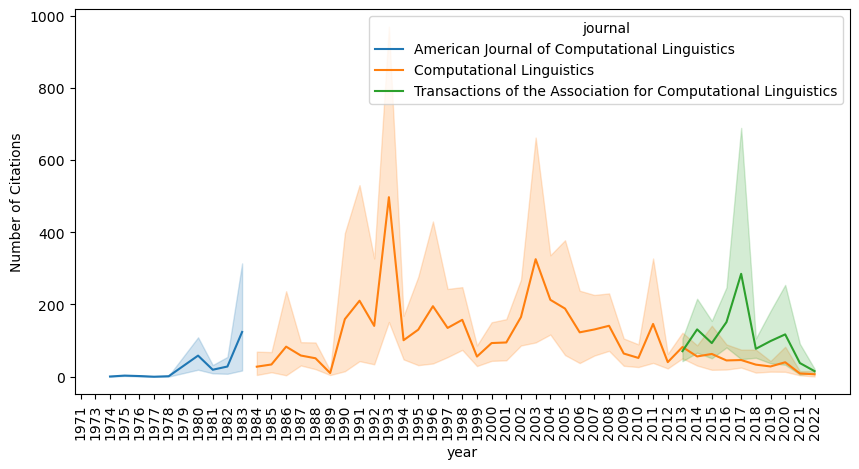

In [37]:
import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="year",y="numcitedby", hue="journal", data=df, sort=False)
plt.xticks(rotation="vertical")
plt.ylabel("Number of Citations")